## CAGE
### implementation the paper source code using tensorflow, CAGE4HAR (https://github.com/quotation2520/CAGE4HAR)

<br>

- **Gyuyeon Lim (lky473736)**
- 2024.12.01. ~ 2024.12.31.

- **Reference**
    - https://github.com/quotation2520/CAGE4HAR
    - https://ieeexplore.ieee.org/document/9961198/
    - https://astonishing-antlion-13b.notion.site/Contrastive-Accelerometer-Gyroscope-Embedding-Model-for-Human-Activity-Recognition-162e61796c4280b59b13d7978e33ad8c?pvs=4
    - https://astonishing-antlion-13b.notion.site/CLIP-Learning-Transferable-Visual-Models-From-Natural-Language-Supervision-163e61796c4280ff95e8cf08dc5c759e?pvs=4
   
-----

### <span id='dl'><mark>introduction</mark></span>

CAGE4HAR proposes a two-stream CNN model that uses accelerometer and gyroscope data to capture distinct physical characteristics and generate clear patterns by processing accelerometer and gyroscope signals individually. Additionally, self-supervised learning is introduced to enhance feature extraction performance by allowing the two encoders to refer to one another. The model is inspired by OpenAI's language supervision structure, CLIP, and structures a similar architecture.

Based on this paper, I will implement it with TensorFlow. While the existing implementation follows an object-oriented structure using PyTorch, its lack of annotations and complexity in operation may hinder its usability in other fields. Therefore, I will reimplement it using TensorFlow and conduct experiments with the same dataset to evaluate the results.

In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import numpy as np
import scipy
from tqdm import tqdm 

2024-12-28 10:11:42.088890: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D
import math

In [3]:
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.utils import plot_model
import matplotlib.pyplot as plt

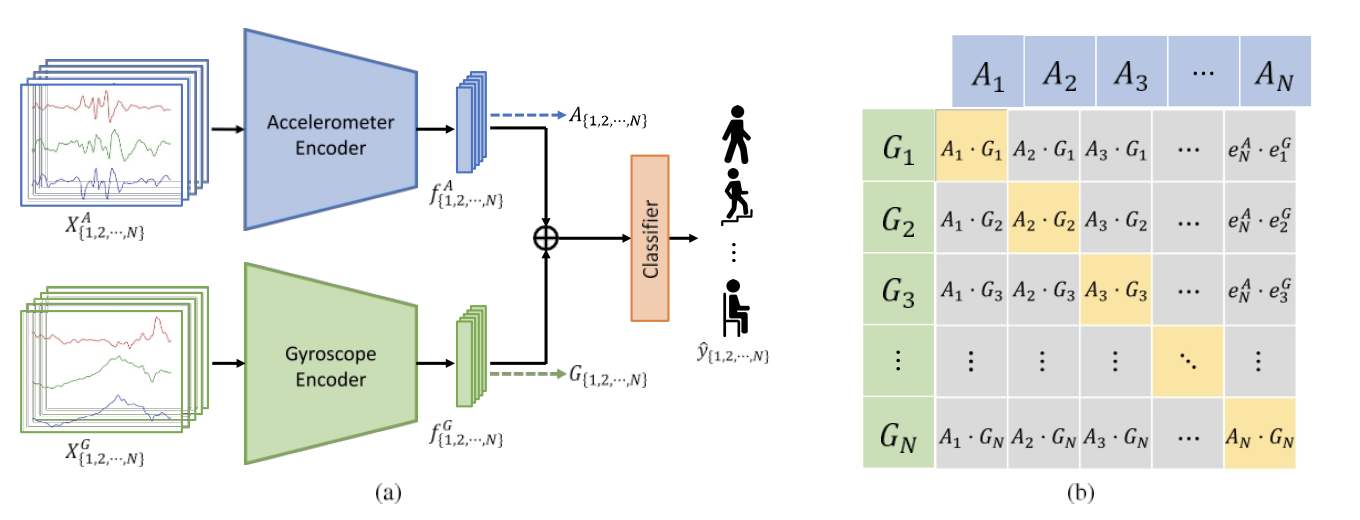

The figure represents the overall structure of CAGE4HAR, where the encoder for gyroscope and the encoder for accelerometer are arranged side by side. Each encoder takes its respective sensor signal as input, performs feature extraction, and then combines the results to pass them to the classifier. During training, the features are projected into a shared embedding space to achieve the objective of SSL.

-----

### <span id='dl'><mark>architecture of model</mark></span>

The models being compared include a total of 5: Baseline_CNN, CAGE, ConvAE, DeepConvAE, and LSTM_CNN. Below are descriptions of each model's characteristics :

- Comparison Models  
  - **DeepConvLSTM**: Consists of 4 convolutional layers and 2 LSTM layers  
  - **LSTM-CNN**  
  - **CAE (Convolutional Autoencoder)**: Uses SSL tasks for reconstructing masked timestamps  
  - **Masked Reconstruction**: Uses SSL tasks for reconstructing masked timestamps  
  - **CPC (Contrastive Predictive Coding)**: Infers the global structure of time-series data and predicts subsequent timestamps (used for pretraining and fine-tuning)  
  - **1 Stream Model**: Uses 1 encoder with twice the number of kernels  
  - **2 Stream Model**: Has the same architecture as CAGE but is trained without auxiliary supervision

In [ ]:
# 작성 중 (28일~29일에 밤새서 오류잡기 + scheduling 쪽 다시 손보기)